**With Pipeline**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file_path=r'C:\Users\jagad\Downloads\Rotten_Tomatoes_Movies3.xls\Rotten_Tomatoes_Movies3.xls'

# Load only necessary columns
columns_to_load = ['tomatometer_rating', 'runtime_in_minutes', 'audience_rating']  # Replace with actual column names
data = pd.read_excel(file_path, usecols=columns_to_load)
data.head()

,runtime_in_minutes,tomatometer_rating,audience_rating
0,83.0,49,53.0
1,90.0,86,64.0
2,118.0,68,53.0
3,95.0,100,97.0
4,127.0,89,74.0


In [2]:
data.isnull().sum()

runtime_in_minutes    155
tomatometer_rating      0
audience_rating       252
dtype: int64

In [3]:
data.fillna(method='ffill', inplace=True)
data.isnull().sum()

runtime_in_minutes    0
tomatometer_rating    0
audience_rating       0
dtype: int64

In [4]:
data.dtypes

runtime_in_minutes    float64
tomatometer_rating      int64
audience_rating       float64
dtype: object

In [5]:
X = data.drop('audience_rating', axis=1)
y = data['audience_rating']
print(X.shape, y.shape)

(16638, 2) (16638,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [8]:
# Create a pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),  # Scale features
    ('model', LogisticRegression())  # Linear regression model
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [9]:
# Make predictions
y_pred = pipeline.predict(X_test)
y_pred

array([52., 35., 72., ..., 82., 80., 72.])

In [10]:
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score

# Calculate evaluation metrics
acc_dt=round(accuracy_score(y_test,y_pred)*100,2)
f1_dt=round(f1_score(y_test,y_pred, average='weighted', zero_division=0)*100,2)  # Specify average='weighted'
precision_dt=round(precision_score(y_test,y_pred, average='weighted', zero_division=0)*100,2) # Specify average='weighted'
recall_dt=round(recall_score(y_test,y_pred, average='weighted', zero_division=0)*100,2) # Specify average='weighted'
print(f"accuaracy is: {acc_dt}%")
print(f"F1 is: {f1_dt}%")
print(f"Precision is: {precision_dt}%")
print(f"Recall is: {recall_dt}%")
print(f"Recall is: {recall_dt}%") 

accuaracy is: 2.58%
F1 is: 0.97%
Precision is: 0.72%
Recall is: 2.58%
Recall is: 2.58%


**without pipeline**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
file_path=r'C:\Users\jagad\Downloads\Rotten_Tomatoes_Movies3.xls\Rotten_Tomatoes_Movies3.xls'

# Load only necessary columns
columns_to_load = ['tomatometer_rating', 'runtime_in_minutes', 'audience_rating']  # Replace with actual column names
data = pd.read_excel(file_path, usecols=columns_to_load)
data.head()

,runtime_in_minutes,tomatometer_rating,audience_rating
0,83.0,49,53.0
1,90.0,86,64.0
2,118.0,68,53.0
3,95.0,100,97.0
4,127.0,89,74.0


In [13]:
data.fillna(method='ffill', inplace=True)
data.isnull().sum()

runtime_in_minutes    0
tomatometer_rating    0
audience_rating       0
dtype: int64

In [14]:
X = data.drop('audience_rating', axis=1)
y = data['audience_rating']
print(X.shape, y.shape)

(16638, 2) (16638,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# predictions
y_pred = model.predict(X_test)
y_pred

array([54.25862297, 52.98514645, 66.26488028, ..., 69.05244811,
       71.27042093, 63.94427316])

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 12.287456776541545
Mean Squared Error: 236.75948249683958
R-squared: 0.4302708363756904


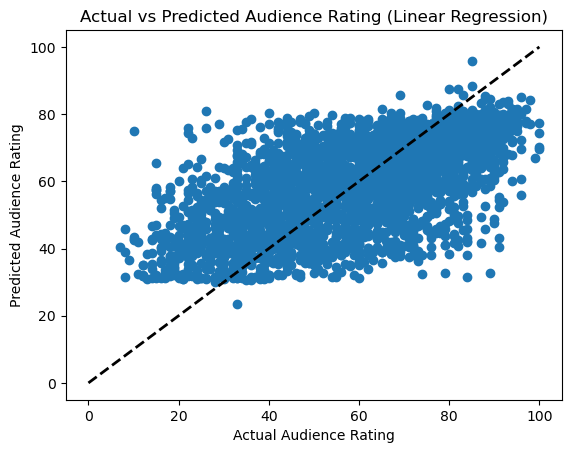

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Rating (Linear Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()